# Question Two Data Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Taking ing_count (created by you), simply turning this into a DataFrame with the relevant columns.
# Sorting and writing to CSV.

# liquor_count = pd.DataFrame.from_dict(ing_count, orient='index')
# liquor_count.reset_index(level=0, inplace=True)
# liquor_count.columns = ['Name','Count']
# liquor_count['Name'] = liquor_count['Name'].str.lower()
# liquor_count = liquor_count.sort_values(by=['Count'], ascending=False)
# liquor_count.to_csv('ingredients_list.csv')

In [ ]:
### NOTE: Adding in a csv read here if you actually wanted to run this Notebook. I recommend against it though!

# df = pd.read_csv("ingredients_list.csv")
# df = df.drop('Unnamed: 0', axis=1)
# drink_names = df.Name

In [ ]:
# Creating two lists of alcoholic and non-alcoholic.

# alcoholic = []
# non_alcoholic = []

In [ ]:
# Manual filtration of ingredients in DF to these two lists. Ugly manual filtration.

# for n in drink_names:
#         answer = input(f"Is {n} alcoholic?\r")
#         if answer == "" or answer == "y":
#             alcoholic.append(n)
#         else:
#             non_alcoholic.append(n)

In [ ]:
# Lists to Series and drop NAs, nothing flashy.

# alcoholic_df = pd.Series(alcoholic).dropna()
# non_alcoholic_df = pd.Series(non_alcoholic).dropna()

In [ ]:
# Created two CSVs for these DataFrames so that I wouldn't have to re-classify these ever again..

# alcoholic_df.to_csv("alcohol_items.csv")
# non_alcoholic_df.to_csv("non_alcohol_items.csv")

In [ ]:
# Technically, that is all the data cleaning that was done. The remaining filtration was part of the data analysis.

# Question Two Data Analysis

## Initial Data Preparation

In [ ]:
# Reading in alcoholic_df.csv so that you can actually run this Notebook. I recommend against it though!

# alcoholic_df = pd.read_csv("alcohol_items.csv")

In [ ]:
# Created groups for bulk-categorization.

# alcohol_groups = [
#     'gin','liqueur','vodka','rum',
#     'schnapps','scotch','wine','creme',
#     'vermouth','sambuca','whiskey','tequila',
#     'absolut','brandy'
# ]

In [ ]:
# Simply taking items with the category name somewhere in the name and assigning to the category.
# Example: Bacardi Rum, Dark Rum, Light Rum and Rum would be assigned simply to Rum.
# Shrinks list from over 150 items down to under 90.

# for g in alcohol_groups:
#     converter = alcoholic_df.loc[alcoholic_df['Names'].str.contains(g), 'Names'] = g

In [ ]:
# Storing everything into new DataFrame to not risk tampering with old stuff. Unnecessary step but opted for it.

# alcohol_names = alcoholic_df.groupby(['Names'])
# add_values = alcohol_names['Count'].sum()
# alcoholic_df_ = pd.DataFrame(add_values).sort_values(by=['Count'], ascending=False).reset_index()

In [ ]:
# With 90 items, now we need to assigned named items into bigger categories. More manual filtration.
# For example, Absolut to Vodka, Prosecco to Wine, etc.

# Categorization = []
# counter = 1
# for n in alcoholic_df_['Names']:
#     categorization = input(f"({counter}/{(len(alcoholic_df_))}) Categorize {n}: ")
#     Categorization.append(categorization)
#     counter += 1

In [ ]:
# Adding in the Category column and removing Names column to use the category as the substitute for name.

# alcoholic_df_['Category'] = Categorization
# alcoholic_df_ = alcoholic_df_.drop(columns=['Names'])

In [ ]:
# Grouping by Category and summing the counts to get totals for the now 15-ish categories of alcohol.
# Content is stored in yet another new DataFrame (not necessary kept straightforward and simplistic).

# alcohol_categories = alcoholic_df_.groupby(['Category'])
# add_totals = alcohol_categories['Count'].sum()
# alcohol_categories_df = pd.DataFrame(add_totals).sort_values(by=['Count'], ascending=False).reset_index()

In [ ]:
# Write this DataFrame to a CSV just so I don't have to re-categorize every time I run this stuff (Duh!)

# alcohol_categories_df.to_csv("alcohol_categories.csv")

## Creating Visualizations

In [2]:
# Adding in the final CSV that I wrote so that you can run this file. TOTALLY SAFE TO DO SO FROM HERE.

alcohol_categories_df = pd.read_csv("alcohol_categories.csv")

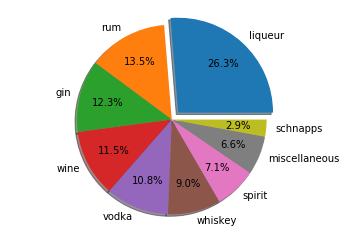

In [3]:
# This pie chart includes the top ten alcoholic categories.
# It has liqueur, which is a "catch-all" category, so might not be fair comparison.

fig1, ax1 = plt.subplots()
ax1.pie(alcohol_categories_df['Count'][0:9], labels=alcohol_categories_df['Category'][0:9], 
        explode=[0.1,0,0,0,0,0,0,0,0], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

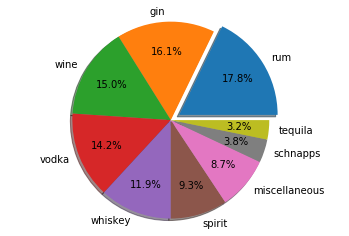

In [4]:
# This pie chart includes the top ten alcoholic categories excluding liqueur--the top alcohol category.

fig1, ax1 = plt.subplots()
ax1.pie(alcohol_categories_df['Count'][1:10], labels=alcohol_categories_df['Category'][1:10], 
        explode=[0.1,0,0,0,0,0,0,0,0], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

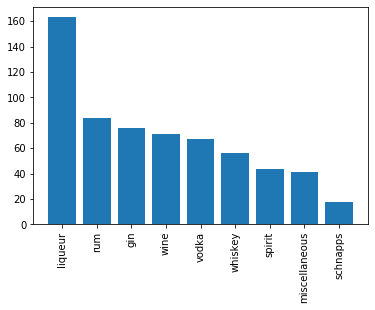

In [5]:
plt.bar(alcohol_categories_df['Category'][0:9],alcohol_categories_df['Count'][0:9])
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

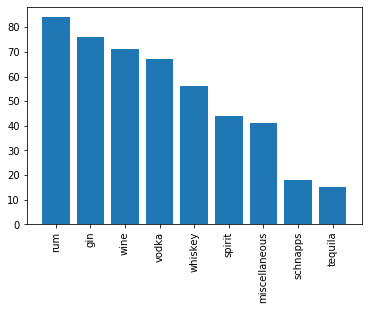

In [6]:
plt.bar(alcohol_categories_df['Category'][1:10],alcohol_categories_df['Count'][1:10])
plt.xticks(rotation='vertical')